---
<h1><center> 4. Capstone Preprocessing </center></h1>


--- 

In [1]:
# packages used
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('capstone_data.csv')
pd.set_option('display.max_columns', 500)
print(data.shape)
data.head()

(125742, 26)


,PLAYER_NAME,PLAYER_ID,TEAM_NAME,PRIMARY_POSITION,HEIGHT,WEIGHT,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,PTS_TYPE,SHOT_RESULT_made,SHOT_RESULT_missed,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,CLOSE_DEF_DIST,CLOSE_DEF_NAME,CLOSE_DEF_ID,CLOSE_DEF_HEIGHT,CLOSE_DEF_WEIGHT,CLOSE_DEF_POSITION
0,Kevin Garnett,708,Brooklyn Nets,4,6-11,240,5.2,0,0.8,2,0,1,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,72,131,3.8,Kelly Olynyk,203482,7-0,240,4
1,Kevin Garnett,708,Brooklyn Nets,4,6-11,240,17.6,0,0.8,2,1,0,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,20,-84,186,7.3,Kelly Olynyk,203482,7-0,240,4
2,Kevin Garnett,708,Brooklyn Nets,4,6-11,240,1.6,0,0.8,2,1,0,Fadeaway Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,54,34,1.7,Kelly Olynyk,203482,7-0,240,4
3,Kevin Garnett,708,Brooklyn Nets,4,6-11,240,10.6,0,0.8,2,0,1,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,17,-146,104,7.3,Kelly Olynyk,203482,7-0,240,4
4,Kevin Garnett,708,Brooklyn Nets,4,6-11,240,14.2,1,2.0,2,0,1,Step Back Jump shot,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,19,-51,190,3.9,Kelly Olynyk,203482,7-0,240,4


In [3]:
# checking to see if column types are as desired
data.dtypes

PLAYER_NAME            object
PLAYER_ID               int64
TEAM_NAME              object
PRIMARY_POSITION        int64
HEIGHT                 object
WEIGHT                  int64
SHOT_CLOCK            float64
DRIBBLES                int64
TOUCH_TIME            float64
PTS_TYPE                int64
SHOT_RESULT_made        int64
SHOT_RESULT_missed      int64
ACTION_TYPE            object
SHOT_TYPE              object
SHOT_ZONE_BASIC        object
SHOT_ZONE_AREA         object
SHOT_ZONE_RANGE        object
SHOT_DISTANCE           int64
LOC_X                   int64
LOC_Y                   int64
CLOSE_DEF_DIST        float64
CLOSE_DEF_NAME         object
CLOSE_DEF_ID            int64
CLOSE_DEF_HEIGHT       object
CLOSE_DEF_WEIGHT        int64
CLOSE_DEF_POSITION      int64
dtype: object

In [4]:
# checking for nans
nan_columns = [col for col in data.columns if data[col].isna().any()]

# Looking at total NaNs in each column that has Nans
total_nans_by_column = data[nan_columns].isna().sum().sort_values(ascending=False)
print('Total NaNs by Column:')
print(total_nans_by_column,'\n')

# percentage of Nans by column in the dataframe
print('Percent NaNs by Column:')
print(total_nans_by_column/len(data)*100)

Total NaNs by Column:
SHOT_CLOCK    5424
dtype: int64 

Percent NaNs by Column:
SHOT_CLOCK    4.313595
dtype: float64


In [5]:
# looking at every row in dataframe that contains nan values
nandf = data[data.isna().sum(axis=1)>0] 
# nandf.head(50)
# after examining can't prove that nan's have anything to do with the the shot clock being very low/ almost expiring
# must decide if I want to drop these rows, or if shot clock even has an impact on field goal %

In [6]:
# checking to make sure number of unique id's match number of player names
print("Unique Values by Column")
for col in data.columns:
    print(f"{col}: {len(data[col].unique())}")

Unique Values by Column
PLAYER_NAME: 270
PLAYER_ID: 270
TEAM_NAME: 30
PRIMARY_POSITION: 5
HEIGHT: 17
WEIGHT: 62
SHOT_CLOCK: 242
DRIBBLES: 33
TOUCH_TIME: 312
PTS_TYPE: 2
SHOT_RESULT_made: 2
SHOT_RESULT_missed: 2
ACTION_TYPE: 49
SHOT_TYPE: 2
SHOT_ZONE_BASIC: 7
SHOT_ZONE_AREA: 6
SHOT_ZONE_RANGE: 5
SHOT_DISTANCE: 81
LOC_X: 438
LOC_Y: 502
CLOSE_DEF_DIST: 299
CLOSE_DEF_NAME: 473
CLOSE_DEF_ID: 473
CLOSE_DEF_HEIGHT: 17
CLOSE_DEF_WEIGHT: 87
CLOSE_DEF_POSITION: 5


There was a descrepency between CLOSE_DEF_NAME & CLOSE_DEF_ID; jumped back into Data Collecting to fix

In [7]:
# # closest defender name versus id is fishy
# fishy = data['CLOSE_DEF_ID'].groupby(data['CLOSE_DEF_NAME']).unique().apply(pd.Series)
# fishy.head(10)

In [8]:
# # nan_columns = [col for col in fishy.columns if fishy[col].isna().any()]

# # Looking at total NaNs in each column that has Nans
# total_nans_by_column = fishy[nan_columns].isna().sum().sort_values(ascending=False)
# print('Total NaNs by Column:')
# print(total_nans_by_column,'\n')


In [9]:
# fishy.dropna()

In [10]:
# # messed up on quincy pondexter data input :(
# # df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]

# data.loc[(data['CLOSE_DEF_NAME'] == 'Quincy Pondexter') & (data['CLOSE_DEF_ID'] == 530027)]

In [11]:
# data.loc[(data['CLOSE_DEF_NAME'] == 'Quincy Pondexter') & (data['CLOSE_DEF_ID'] == 202347)]

In [12]:
data.columns

Index(['PLAYER_NAME', 'PLAYER_ID', 'TEAM_NAME', 'PRIMARY_POSITION', 'HEIGHT',
       'WEIGHT', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'PTS_TYPE',
       'SHOT_RESULT_made', 'SHOT_RESULT_missed', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'CLOSE_DEF_DIST', 'CLOSE_DEF_NAME', 'CLOSE_DEF_ID',
       'CLOSE_DEF_HEIGHT', 'CLOSE_DEF_WEIGHT', 'CLOSE_DEF_POSITION'],
      dtype='object')

In [13]:
# examining categorical columns
categorical_columns = ['TEAM_NAME','PRIMARY_POSITION','HEIGHT','SHOT_RESULT_made','SHOT_RESULT_missed',\
                       'ACTION_TYPE','SHOT_TYPE','SHOT_ZONE_BASIC','SHOT_ZONE_AREA','SHOT_ZONE_RANGE',\
                      'CLOSE_DEF_HEIGHT', 'CLOSE_DEF_POSITION', 'PTS_TYPE']

# Iterating through list of categorical columns and take a look at the values of each
for col in categorical_columns:
    print(col+':')
    print(data[col].unique(),'\n') 

TEAM_NAME:
['Brooklyn Nets' 'Los Angeles Lakers' 'San Antonio Spurs'
 'Memphis Grizzlies' 'Dallas Mavericks' 'Washington Wizards'
 'Los Angeles Clippers' 'Chicago Bulls' 'New York Knicks'
 'Detroit Pistons' 'Indiana Pacers' 'Cleveland Cavaliers'
 'Portland Trail Blazers' 'Oklahoma City Thunder' 'Atlanta Hawks'
 'Miami Heat' 'Houston Rockets' 'Charlotte Hornets' 'Orlando Magic'
 'Toronto Raptors' 'Sacramento Kings' 'Minnesota Timberwolves'
 'New Orleans Pelicans' 'Philadelphia 76ers' 'Phoenix Suns' 'Utah Jazz'
 'Golden State Warriors' 'Milwaukee Bucks' 'Boston Celtics'
 'Denver Nuggets'] 

PRIMARY_POSITION:
[4 2 5 3 1] 

HEIGHT:
['6-11' '6-6' '7-0' '6-7' '6-3' '6-5' '7-1' '6-9' '6-10' '6-8' '6-1' '6-0'
 '6-2' '7-2' '6-4' '5-9' '5-11'] 

SHOT_RESULT_made:
[0 1] 

SHOT_RESULT_missed:
[1 0] 

ACTION_TYPE:
['Jump Shot' 'Fadeaway Jump Shot' 'Step Back Jump shot'
 'Driving Layup Shot' 'Alley Oop Dunk Shot' 'Layup Shot' 'Tip Shot'
 'Finger Roll Layup Shot' 'Turnaround Jump Shot' 'Driving Jump 

In [14]:
# examine back court shots, do I care about them?
back_court_df = data.loc[data['SHOT_ZONE_RANGE'] == 'Back Court Shot']
print(back_court_df.shape)
back_court_df.head(10)

(276, 26)


,PLAYER_NAME,PLAYER_ID,TEAM_NAME,PRIMARY_POSITION,HEIGHT,WEIGHT,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,PTS_TYPE,SHOT_RESULT_made,SHOT_RESULT_missed,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,CLOSE_DEF_DIST,CLOSE_DEF_NAME,CLOSE_DEF_ID,CLOSE_DEF_HEIGHT,CLOSE_DEF_WEIGHT,CLOSE_DEF_POSITION
124,Rudy Gay,200752,Sacramento Kings,3,6-8,230,NaN,3,1.5,3,0,1,Jump Shot,3PT Field Goal,Above the Break 3,Back Court(BC),Back Court Shot,40,-67,400,3.2,Kelly Olynyk,203482,7-0,240,4
617,Joakim Noah,201149,Chicago Bulls,5,6-11,230,NaN,1,2.1,3,0,1,Jump Shot,3PT Field Goal,Backcourt,Back Court(BC),Back Court Shot,73,176,717,7.2,Josh Smith,2746,6-9,225,4
1310,Jamal Crawford,2037,Los Angeles Clippers,2,6-5,185,NaN,4,3.5,3,0,1,Jump Shot,3PT Field Goal,Backcourt,Back Court(BC),Back Court Shot,45,0,459,3.3,Kentavious Caldwell-Pope,203484,6-5,205,2
2277,Mason Plumlee,203486,Brooklyn Nets,4,6-11,235,NaN,1,1.0,3,0,1,Jump Shot,3PT Field Goal,Backcourt,Back Court(BC),Back Court Shot,49,-89,484,10.7,Greg Monroe,202328,6-11,265,5
2844,Zach Randolph,2216,Memphis Grizzlies,4,6-9,250,NaN,0,0.0,3,0,1,Jump Shot,3PT Field Goal,Backcourt,Back Court(BC),Back Court Shot,64,-166,626,4.5,Thaddeus Young,201152,6-8,221,4
4019,Joe Johnson,2207,Brooklyn Nets,2,6-7,240,NaN,1,1.2,3,0,1,Jump Shot,3PT Field Goal,Backcourt,Back Court(BC),Back Court Shot,58,100,578,12.3,Elfrid Payton,203901,6-4,185,1
4190,Marreese Speights,201578,Golden State Warriors,4,6-10,255,NaN,0,0.3,3,0,1,Jump Shot,3PT Field Goal,Backcourt,Back Court(BC),Back Court Shot,59,170,567,10.9,Elfrid Payton,203901,6-4,185,1
4444,Trey Burke,203504,Utah Jazz,1,6-1,175,NaN,1,1.4,3,0,1,Jump Shot,3PT Field Goal,Backcourt,Back Court(BC),Back Court Shot,46,-123,448,4.1,Elfrid Payton,203901,6-4,185,1
7138,Steve Blake,2581,Portland Trail Blazers,1,6-3,172,NaN,0,0.1,3,0,1,Running Jump Shot,3PT Field Goal,Backcourt,Back Court(BC),Back Court Shot,78,189,766,3.1,Amar'e Stoudemire,2405,6-10,245,4
7233,Ryan Anderson,201583,New Orleans Pelicans,4,6-10,240,NaN,0,0.6,3,0,1,Jump Shot,3PT Field Goal,Backcourt,Back Court(BC),Back Court Shot,63,189,607,5.1,Amar'e Stoudemire,2405,6-10,245,4


In [15]:
nan_columns2 = [col for col in back_court_df.columns if back_court_df[col].isna().any()]

# Looking at total NaNs in each column that has Nans
total_nans_by_column2 = back_court_df[nan_columns2].isna().sum().sort_values(ascending=False)
print('Total NaNs by Column:')
print(total_nans_by_column2,'\n')

# percentage of Nans by column back_court_dfframe
print('Percent NaNs by Column:')
print(total_nans_by_column2/len(back_court_df)*100)

Total NaNs by Column:
SHOT_CLOCK    267
dtype: int64 

Percent NaNs by Column:
SHOT_CLOCK    96.73913
dtype: float64


There's a very high percentage of backcourt shots taken with Nan values in the SHOT_CLOCK column. Will most likely drop back court shots as it also appears they are taken from near/ beyond half court which I don't care about when examining field goal percentage

In [16]:
# 47 feet is halfcourt
back_court_df2 = back_court_df.loc[back_court_df['SHOT_DISTANCE'] < 41]
print(back_court_df2.shape)
back_court_df2.head(10)

(9, 26)


,PLAYER_NAME,PLAYER_ID,TEAM_NAME,PRIMARY_POSITION,HEIGHT,WEIGHT,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,PTS_TYPE,SHOT_RESULT_made,SHOT_RESULT_missed,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,CLOSE_DEF_DIST,CLOSE_DEF_NAME,CLOSE_DEF_ID,CLOSE_DEF_HEIGHT,CLOSE_DEF_WEIGHT,CLOSE_DEF_POSITION
124,Rudy Gay,200752,Sacramento Kings,3,6-8,230,NaN,3,1.5,3,0,1,Jump Shot,3PT Field Goal,Above the Break 3,Back Court(BC),Back Court Shot,40,-67,400,3.2,Kelly Olynyk,203482,7-0,240,4
22861,Marcus Morris,202694,Phoenix Suns,4,6-9,235,NaN,0,0.0,3,0,1,Jump Shot,3PT Field Goal,Above the Break 3,Back Court(BC),Back Court Shot,40,75,399,4.9,John Henson,203089,6-11,219,4
34720,Rudy Gay,200752,Sacramento Kings,3,6-8,230,NaN,0,0.6,3,0,1,Jump Shot,3PT Field Goal,Above the Break 3,Back Court(BC),Back Court Shot,40,75,399,5.0,Mike Miller,2034,6-8,218,3
52933,Kemba Walker,202689,Charlotte Hornets,1,6-1,184,22.3,2,3.5,3,0,1,Jump Shot,3PT Field Goal,Above the Break 3,Back Court(BC),Back Court Shot,40,40,408,15.8,Jrue Holiday,201950,6-4,205,1
70369,LeBron James,2544,Cleveland Cavaliers,3,6-8,250,NaN,0,1.0,3,0,1,Jump Shot,3PT Field Goal,Above the Break 3,Back Court(BC),Back Court Shot,40,7,405,15.8,Jae Crowder,203109,6-6,235,3
94902,Khris Middleton,203114,Milwaukee Bucks,3,6-8,222,NaN,0,1.1,3,0,1,Jump Shot,3PT Field Goal,Above the Break 3,Back Court(BC),Back Court Shot,40,1,402,10.4,Lavoy Allen,202730,6-9,260,4
99788,C.J. Watson,201228,Indiana Pacers,1,6-2,175,NaN,3,2.3,3,0,1,Jump Shot,3PT Field Goal,Above the Break 3,Back Court(BC),Back Court Shot,40,9,400,3.4,Omri Casspi,201956,6-9,225,3
105326,Brian Roberts,203148,Charlotte Hornets,1,6-1,173,NaN,4,3.4,3,0,1,Jump Shot,3PT Field Goal,Above the Break 3,Back Court(BC),Back Court Shot,40,-75,403,6.0,Aaron Brooks,201166,6-0,161,1
119053,Solomon Hill,203524,Indiana Pacers,3,6-7,225,NaN,1,2.8,3,0,1,Jump Shot,3PT Field Goal,Above the Break 3,Back Court(BC),Back Court Shot,40,7,407,4.6,Shelvin Mack,202714,6-3,203,1


Dropping back court shots as they are all from 40ft away and more. Which makes sense as they could be taken around half court and released as the player's momentum carries them forward

In [17]:
# dropping back court shots
data = data[data.SHOT_ZONE_RANGE != 'Back Court Shot']

In [18]:
# verifying new df
print(back_court_df.shape)
print(data.shape)
print(125742 - 276)

(276, 26)
(125466, 26)
125466


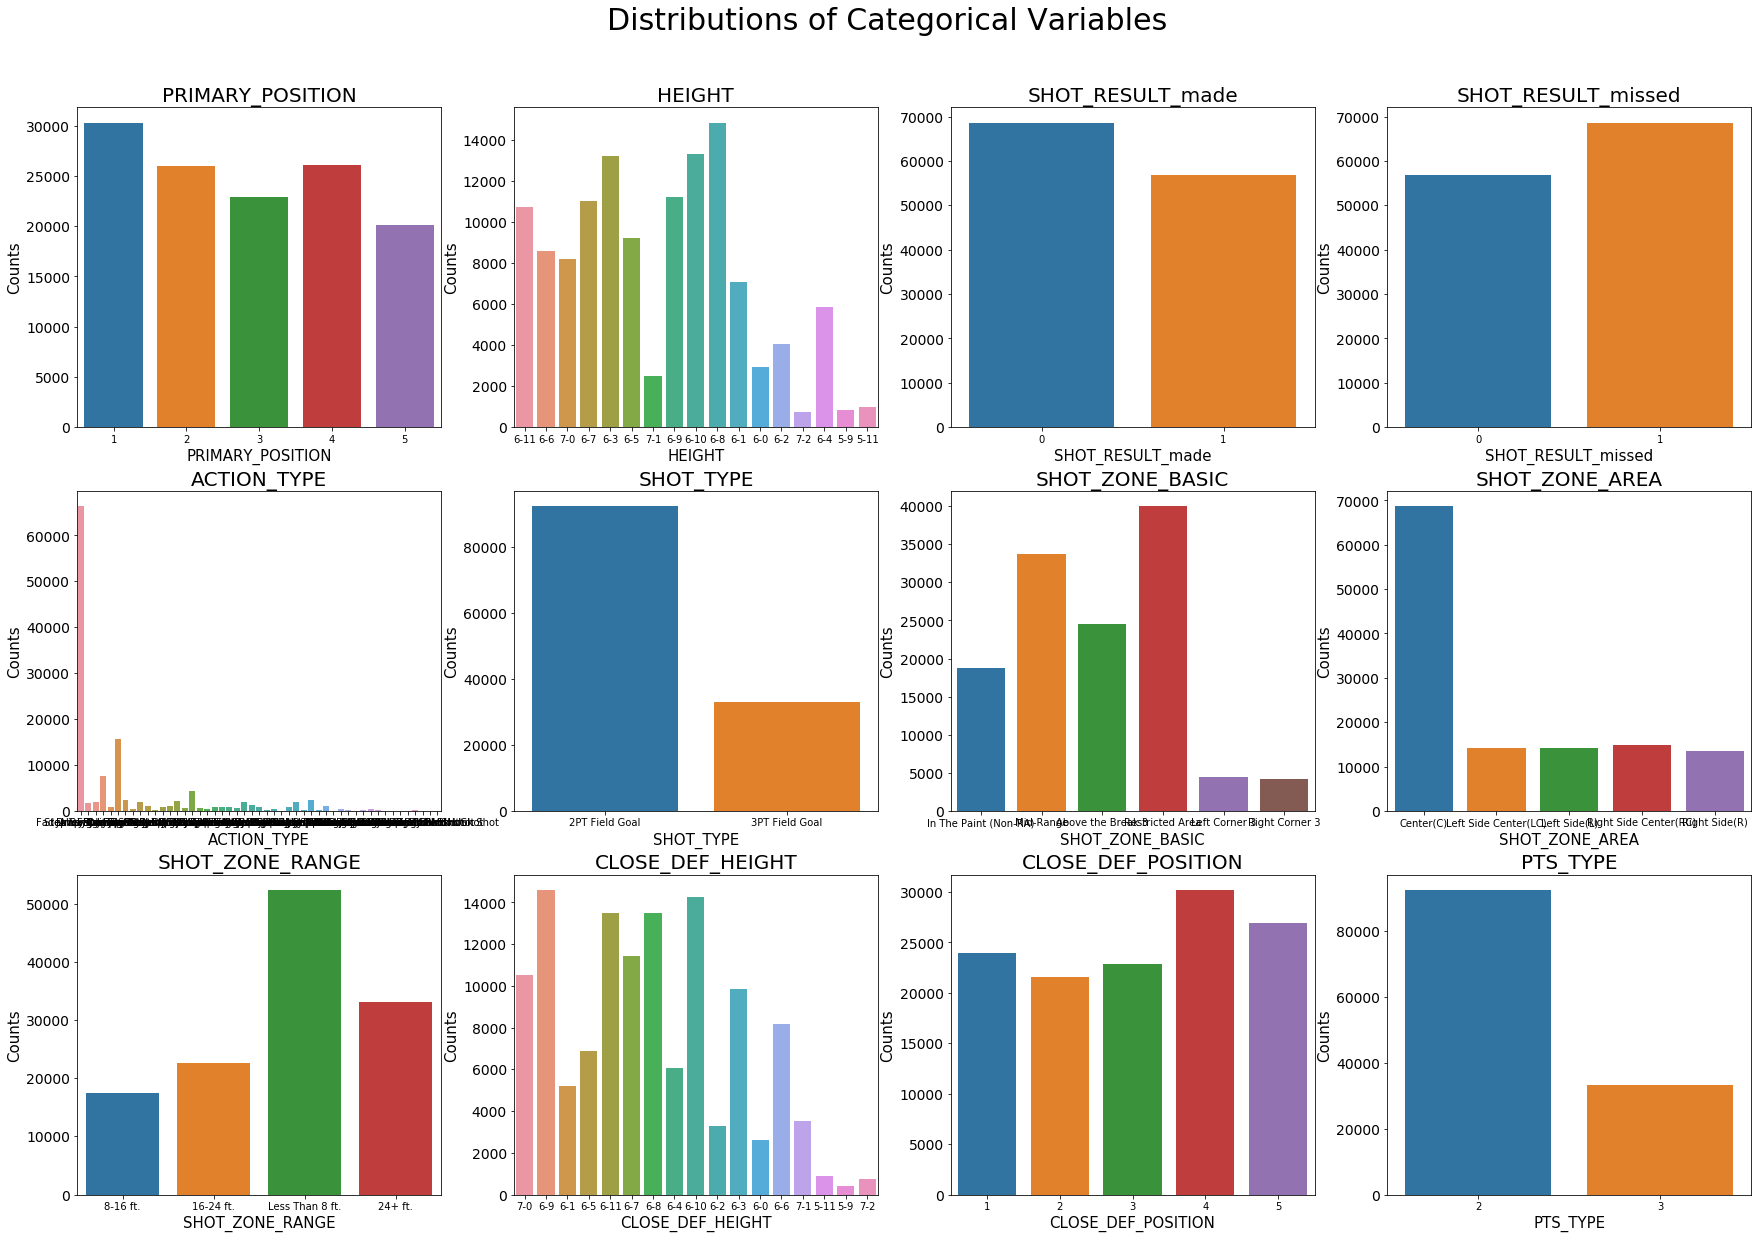

In [19]:
cat_columns = ['PRIMARY_POSITION','HEIGHT','SHOT_RESULT_made','SHOT_RESULT_missed',\
               'ACTION_TYPE','SHOT_TYPE','SHOT_ZONE_BASIC','SHOT_ZONE_AREA','SHOT_ZONE_RANGE',\
               'CLOSE_DEF_HEIGHT', 'CLOSE_DEF_POSITION', 'PTS_TYPE']

f,axes = plt.subplots(3,4,figsize=(30,20))
axes = axes.ravel()
for i,col in enumerate(cat_columns):
    sns.countplot(data[col],ax=axes[i])
    axes[i].set_title(f'{col}',size=20)
    axes[i].set_xlabel(col,size=15)
    axes[i].set_ylabel('Counts',size=15)
    axes[i].tick_params(axis='y', labelsize=14)
plt.suptitle('Distributions of Categorical Variables',
             size=30,
             y=0.95)
plt.show()

In [20]:
# check to make sure touch time, and dribbles are positive and whatever else

def numInfo(x):
    isNegative = data.loc[data[x] < 0].shape[0]
    Min = min(data[x]) 
    Max = max(data[x])
    Mean = data[x].mean()
    
    return print(f' There are {isNegative} negative data points in {x}'"\n"
                 f' The lowest value in {x} is {Min}'"\n"
                 f' The highest value in {x} is {Max}'"\n"
                 f' The average of the values in {x} is {Mean}'"\n")

def isNegative(x):
    return data.loc[data[x] < 0]

In [21]:
data.columns

Index(['PLAYER_NAME', 'PLAYER_ID', 'TEAM_NAME', 'PRIMARY_POSITION', 'HEIGHT',
       'WEIGHT', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'PTS_TYPE',
       'SHOT_RESULT_made', 'SHOT_RESULT_missed', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'CLOSE_DEF_DIST', 'CLOSE_DEF_NAME', 'CLOSE_DEF_ID',
       'CLOSE_DEF_HEIGHT', 'CLOSE_DEF_WEIGHT', 'CLOSE_DEF_POSITION'],
      dtype='object')

In [22]:
num_columns = ['WEIGHT', 'CLOSE_DEF_WEIGHT', 'SHOT_CLOCK', 'DRIBBLES',\
               'TOUCH_TIME', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y', 'CLOSE_DEF_DIST']

for col in num_columns:
    numInfo(col)



 There are 0 negative data points in WEIGHT
 The lowest value in WEIGHT is 161
 The highest value in WEIGHT is 280
 The average of the values in WEIGHT is 221.84879568966892

 There are 0 negative data points in CLOSE_DEF_WEIGHT
 The lowest value in CLOSE_DEF_WEIGHT is 161
 The highest value in CLOSE_DEF_WEIGHT is 307
 The average of the values in CLOSE_DEF_WEIGHT is 225.75320007013852

 There are 0 negative data points in SHOT_CLOCK
 The lowest value in SHOT_CLOCK is 0.0
 The highest value in SHOT_CLOCK is 24.0
 The average of the values in SHOT_CLOCK is 12.463015235767896

 There are 0 negative data points in DRIBBLES
 The lowest value in DRIBBLES is 0
 The highest value in DRIBBLES is 32
 The average of the values in DRIBBLES is 2.048212264677283

 There are 306 negative data points in TOUCH_TIME
 The lowest value in TOUCH_TIME is -163.6
 The highest value in TOUCH_TIME is 24.9
 The average of the values in TOUCH_TIME is 2.7868872842043366

 There are 0 negative data points in SHOT_

In [23]:
# 307lb player
data.loc[data['CLOSE_DEF_WEIGHT'] == 307]

,PLAYER_NAME,PLAYER_ID,TEAM_NAME,PRIMARY_POSITION,HEIGHT,WEIGHT,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,PTS_TYPE,SHOT_RESULT_made,SHOT_RESULT_missed,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,CLOSE_DEF_DIST,CLOSE_DEF_NAME,CLOSE_DEF_ID,CLOSE_DEF_HEIGHT,CLOSE_DEF_WEIGHT,CLOSE_DEF_POSITION
111299,Dirk Nowitzki,1717,Dallas Mavericks,4,7-0,245,16.4,0,0.8,2,1,0,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,15,-147,63,6.6,Nikola Pekovic,201593,6-11,307,5
111300,Tyson Chandler,2199,Dallas Mavericks,5,7-1,240,16.4,0,8.3,2,0,1,Alley Oop Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,1,5.8,Nikola Pekovic,201593,6-11,307,5
111301,Tyson Chandler,2199,Dallas Mavericks,5,7-1,240,10.4,0,1.1,2,1,0,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,18,3,1.5,Nikola Pekovic,201593,6-11,307,5
111302,Tyson Chandler,2199,Dallas Mavericks,5,7-1,240,15.5,0,1.0,2,1,0,Jump Shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,19,138,138,6.2,Nikola Pekovic,201593,6-11,307,5
111303,Pau Gasol,2200,Chicago Bulls,4,7-0,250,7.0,3,6.4,2,1,0,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,-35,52,1.5,Nikola Pekovic,201593,6-11,307,5
111304,Pau Gasol,2200,Chicago Bulls,4,7-0,250,9.3,0,2.9,2,1,0,Jump Shot,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,17,-49,168,6.4,Nikola Pekovic,201593,6-11,307,5
111305,Pau Gasol,2200,Chicago Bulls,4,7-0,250,8.0,0,0.8,2,0,1,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,20,209,14,7.6,Nikola Pekovic,201593,6-11,307,5
111306,Pau Gasol,2200,Chicago Bulls,4,7-0,250,3.4,0,3.4,2,1,0,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,13,-138,7,5.1,Nikola Pekovic,201593,6-11,307,5
111307,Joe Johnson,2207,Brooklyn Nets,2,6-7,240,13.7,1,1.5,2,0,1,Floating Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,7,-67,30,2.6,Nikola Pekovic,201593,6-11,307,5
111308,Richard Jefferson,2210,Dallas Mavericks,3,6-7,233,10.4,0,0.8,3,0,1,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,23,233,45,17.2,Nikola Pekovic,201593,6-11,307,5


In [24]:
# SHOT CLOCK AT ZERO
data.loc[data['SHOT_CLOCK'] == 0].shape

(75, 26)

In [25]:
# frequency of Shot clock over 20, could potentially be explained by game strategy situations
data.loc[data['SHOT_CLOCK'] > 20].shape

(13076, 26)

In [26]:
data.loc[data['TOUCH_TIME'] == 0].shape

(2960, 26)

In theory touch time can't be zero, however I will leave the values here as there are a significant amount from .1 to 1. The shots at 0 could've been rounded down. 

In [27]:
# negative touch time needs to be fixed, as does shot clock... fill with median

In [28]:
data.loc[data['TOUCH_TIME'] < 0].shape

(306, 26)

In [29]:
# placing negative TOUCH_TIME as NaN
data['TOUCH_TIME'][data['TOUCH_TIME'] < 0] = np.nan

In [30]:
# checking for nans
nan_columns = [col for col in data.columns if data[col].isna().any()]

# Looking at total NaNs in each column that has Nans
total_nans_by_column = data[nan_columns].isna().sum().sort_values(ascending=False)
print('Total NaNs by Column:')
print(total_nans_by_column,'\n')

# percentage of Nans by column in the dataframe
print('Percent NaNs by Column:')
print(total_nans_by_column/len(data)*100)

Total NaNs by Column:
SHOT_CLOCK    5157
TOUCH_TIME     306
dtype: int64 

Percent NaNs by Column:
SHOT_CLOCK    4.110277
TOUCH_TIME    0.243891
dtype: float64


In [31]:
# filling touch time with action type as tip ins are more likely to have a low touch time versus a jump shot 

def fill_median_by_category(data,nan_column,category):    
    means = data.groupby(category)[nan_column].median()
    data.set_index([category],inplace=True)
    data[nan_column] = data[nan_column].fillna(means)
    data.reset_index(inplace=True)
    print(f"Filled NaNs in '{nan_column}' column with medians of respective '{category}' category")
    return

In [32]:
fill_median_by_category(data, 'TOUCH_TIME', 'ACTION_TYPE')

Filled NaNs in 'TOUCH_TIME' column with medians of respective 'ACTION_TYPE' category


In [33]:
# investigating the large distribution of shot attmepts when the shot clock is over 20
# in theory should help when filling NaN values as the rest of the distribution seems pretty normal

clock1 = data.loc[(data["SHOT_CLOCK"] >= 20) & (data["SHOT_CLOCK"] <= 21)]
clock2 = data.loc[(data["SHOT_CLOCK"] >= 21) & (data["SHOT_CLOCK"] <= 22)]
clock3 = data.loc[(data["SHOT_CLOCK"] >= 22) & (data["SHOT_CLOCK"] <= 23)]
clock4 = data.loc[(data["SHOT_CLOCK"] >= 23) & (data["SHOT_CLOCK"] <= 24)]


print(f' {clock1.shape[0]} shot attempts between 20 and 21')
print(f' {clock2.shape[0]} shot attempts between 21 and 22')
print(f' {clock3.shape[0]} shot attempts between 22 and 23')
print(f' {clock4.shape[0]} shot attempts between 23 and 24')   
     

 4641 shot attempts between 20 and 21
 3094 shot attempts between 21 and 22
 2103 shot attempts between 22 and 23
 5354 shot attempts between 23 and 24


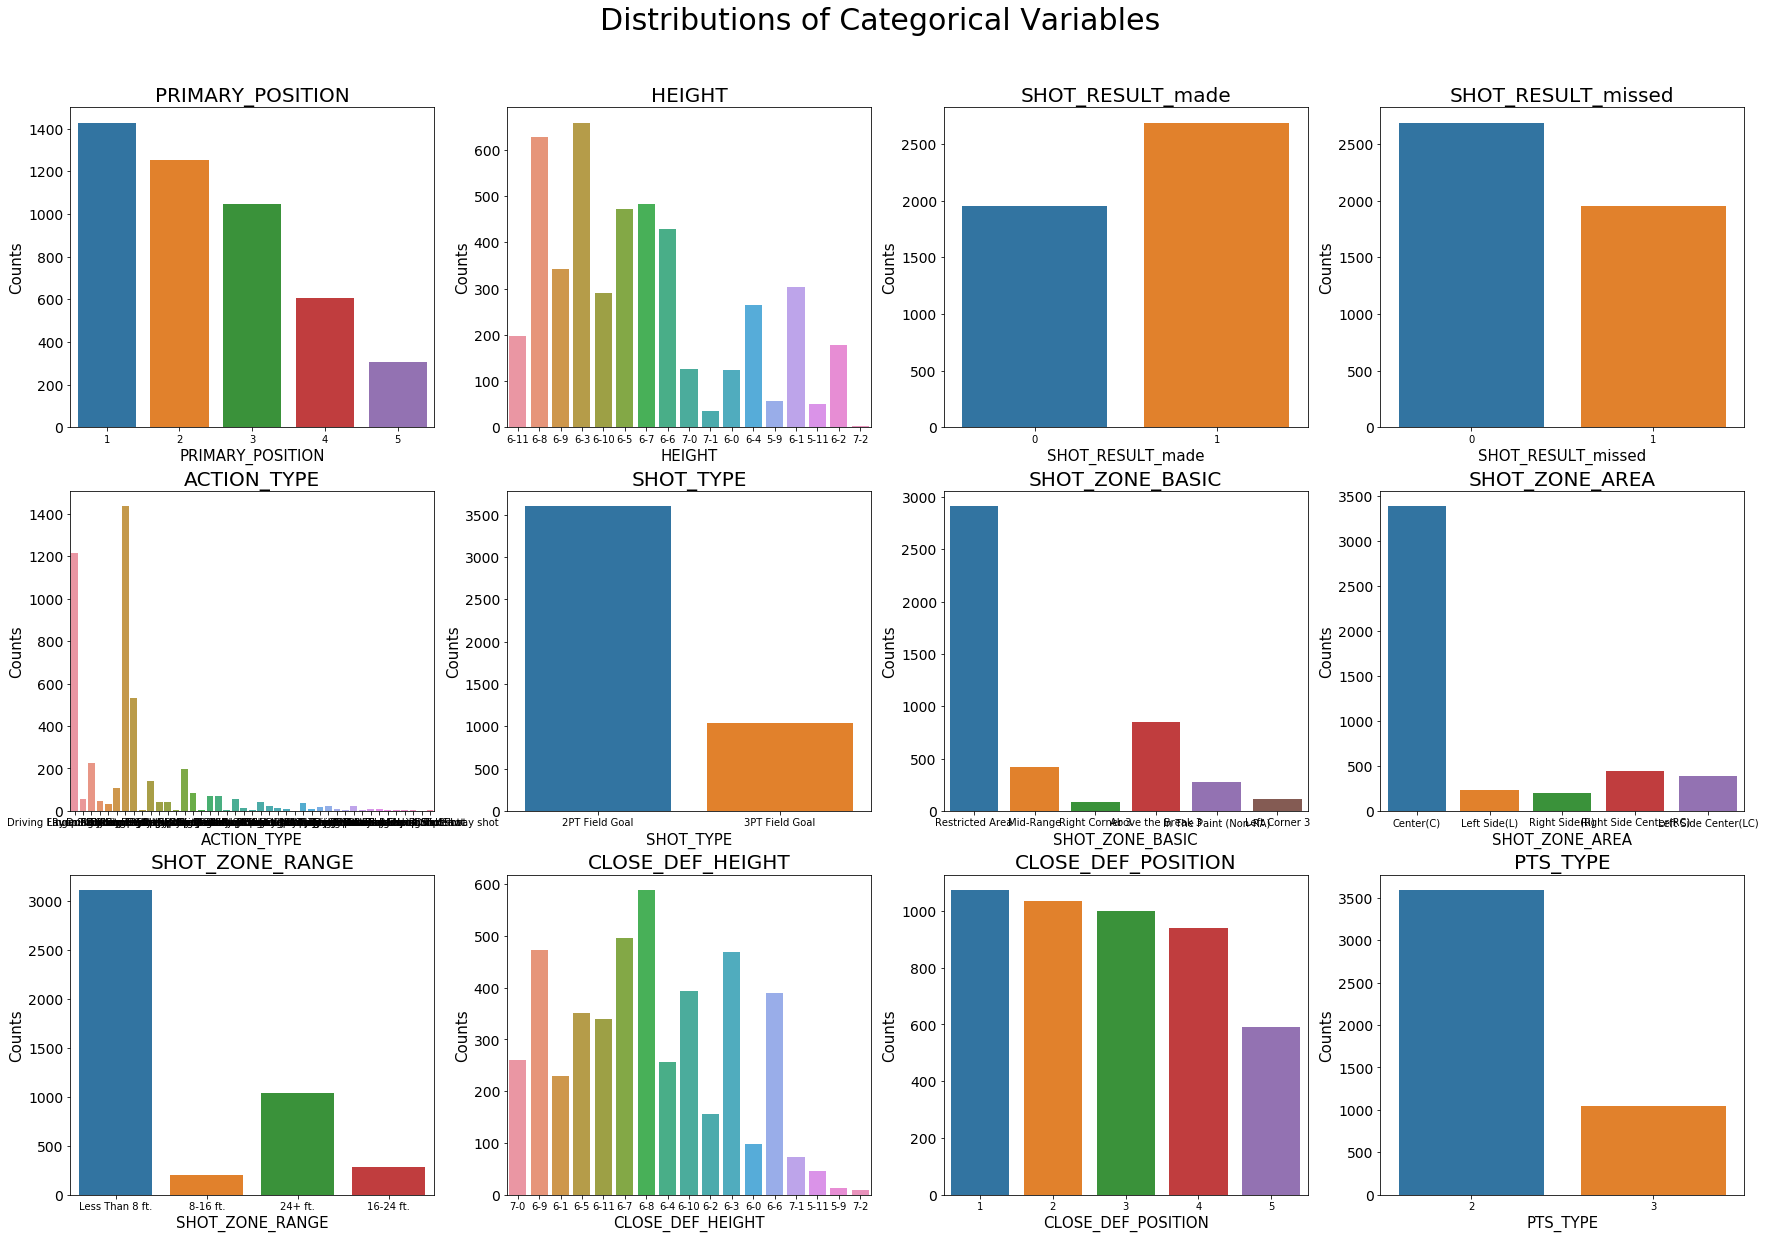

In [34]:
cat_columns = ['PRIMARY_POSITION','HEIGHT','SHOT_RESULT_made','SHOT_RESULT_missed',\
               'ACTION_TYPE','SHOT_TYPE','SHOT_ZONE_BASIC','SHOT_ZONE_AREA','SHOT_ZONE_RANGE',\
               'CLOSE_DEF_HEIGHT', 'CLOSE_DEF_POSITION', 'PTS_TYPE']

f,axes = plt.subplots(3,4,figsize=(30,20))
axes = axes.ravel()
for i,col in enumerate(cat_columns):
    sns.countplot(clock1[col],ax=axes[i])
    axes[i].set_title(f'{col}',size=20)
    axes[i].set_xlabel(col,size=15)
    axes[i].set_ylabel('Counts',size=15)
    axes[i].tick_params(axis='y', labelsize=14)
plt.suptitle('Distributions of Categorical Variables',
             size=30,
             y=0.95)
plt.show()

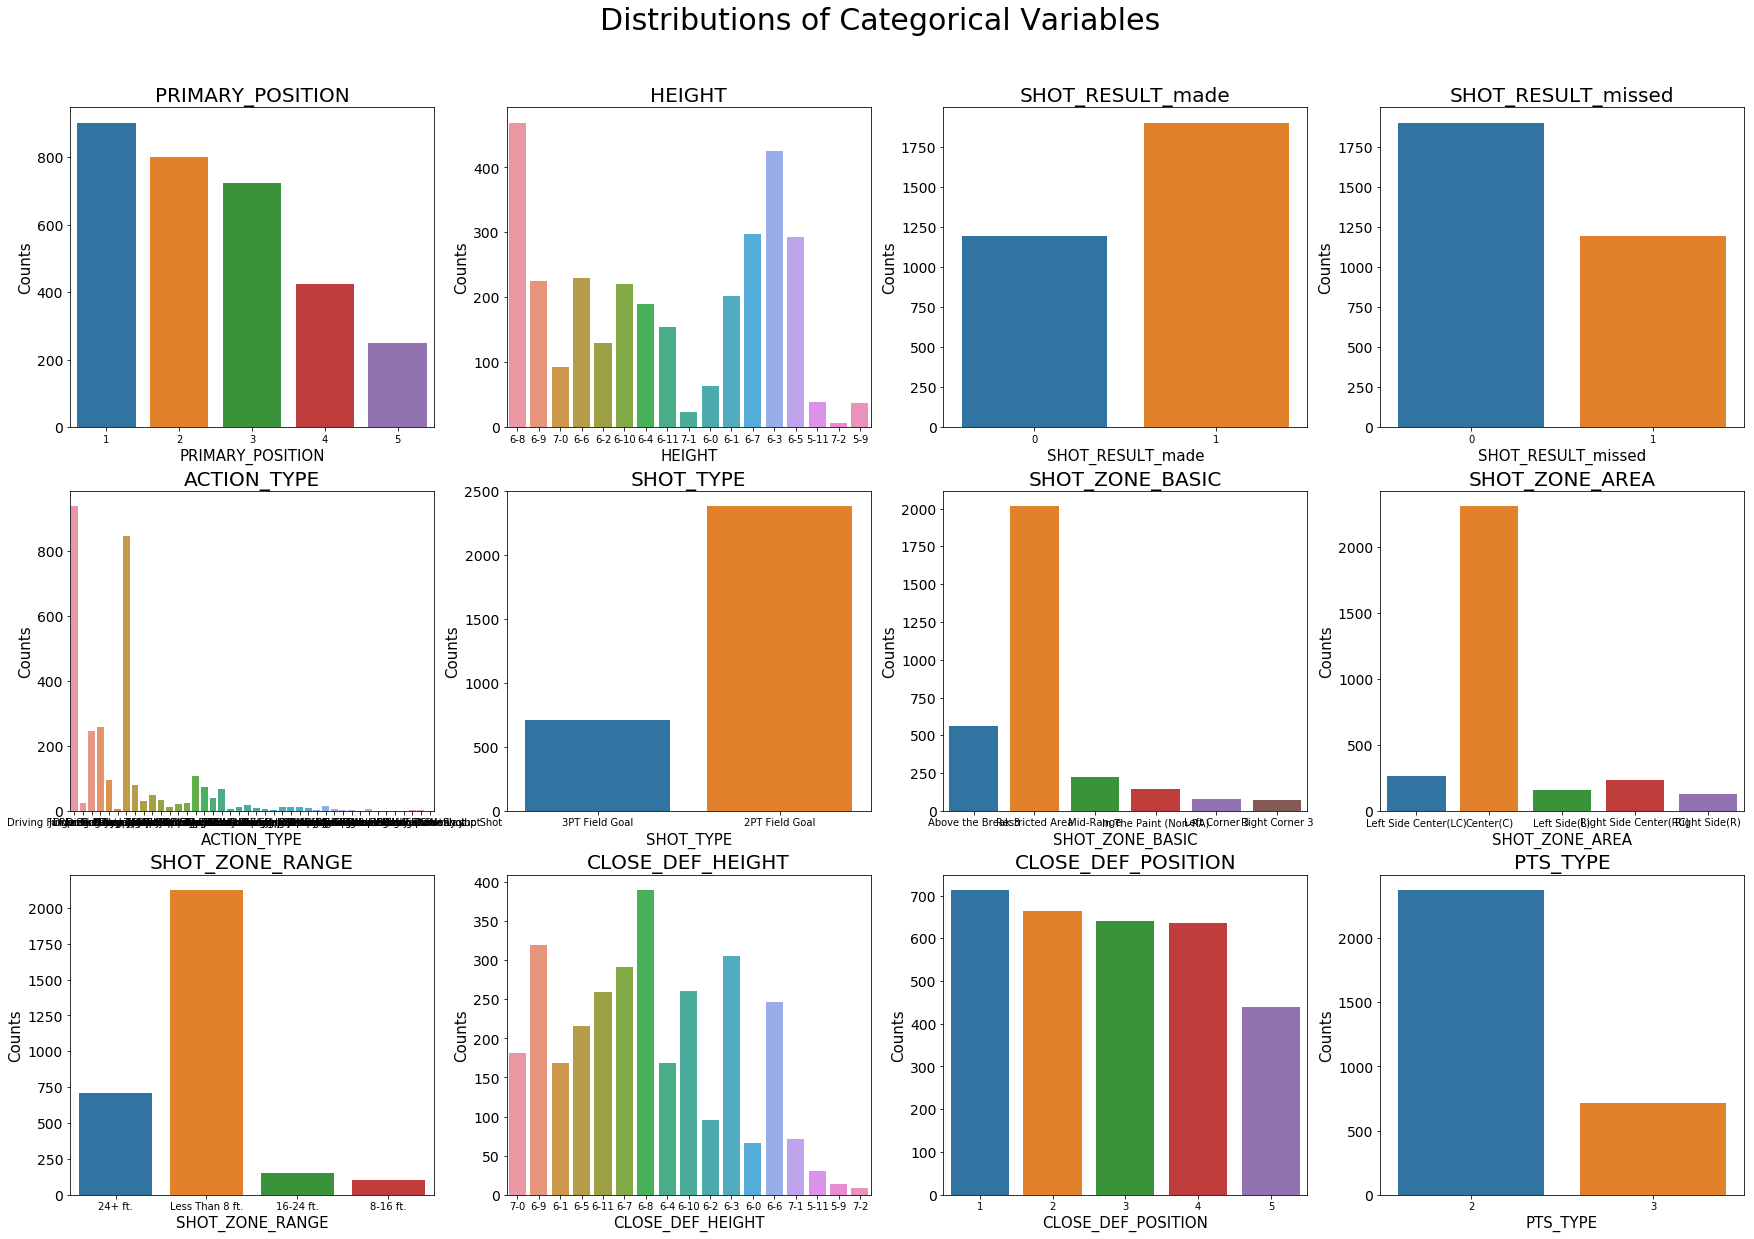

In [35]:
cat_columns = ['PRIMARY_POSITION','HEIGHT','SHOT_RESULT_made','SHOT_RESULT_missed',\
               'ACTION_TYPE','SHOT_TYPE','SHOT_ZONE_BASIC','SHOT_ZONE_AREA','SHOT_ZONE_RANGE',\
               'CLOSE_DEF_HEIGHT', 'CLOSE_DEF_POSITION', 'PTS_TYPE']

f,axes = plt.subplots(3,4,figsize=(30,20))
axes = axes.ravel()
for i,col in enumerate(cat_columns):
    sns.countplot(clock2[col],ax=axes[i])
    axes[i].set_title(f'{col}',size=20)
    axes[i].set_xlabel(col,size=15)
    axes[i].set_ylabel('Counts',size=15)
    axes[i].tick_params(axis='y', labelsize=14)
plt.suptitle('Distributions of Categorical Variables',
             size=30,
             y=0.95)
plt.show()

Decided to fill 'SHOT_CLOCK' based off 'action_type' as well as the higher shot clocks seem to have an increased frequency of whatever the gold action type is

In [36]:
fill_median_by_category(data, 'SHOT_CLOCK', 'ACTION_TYPE')

Filled NaNs in 'SHOT_CLOCK' column with medians of respective 'ACTION_TYPE' category


In [37]:
# checking for nans
nan_columns = [col for col in data.columns if data[col].isna().any()]

# Looking at total NaNs in each column that has Nans
total_nans_by_column = data[nan_columns].isna().sum().sort_values(ascending=False)
print('Total NaNs by Column:')
print(total_nans_by_column,'\n')

# percentage of Nans by column in the dataframe
print('Percent NaNs by Column:')
print(total_nans_by_column/len(data)*100)

Total NaNs by Column:
Series([], dtype: float64) 

Percent NaNs by Column:
Series([], dtype: float64)


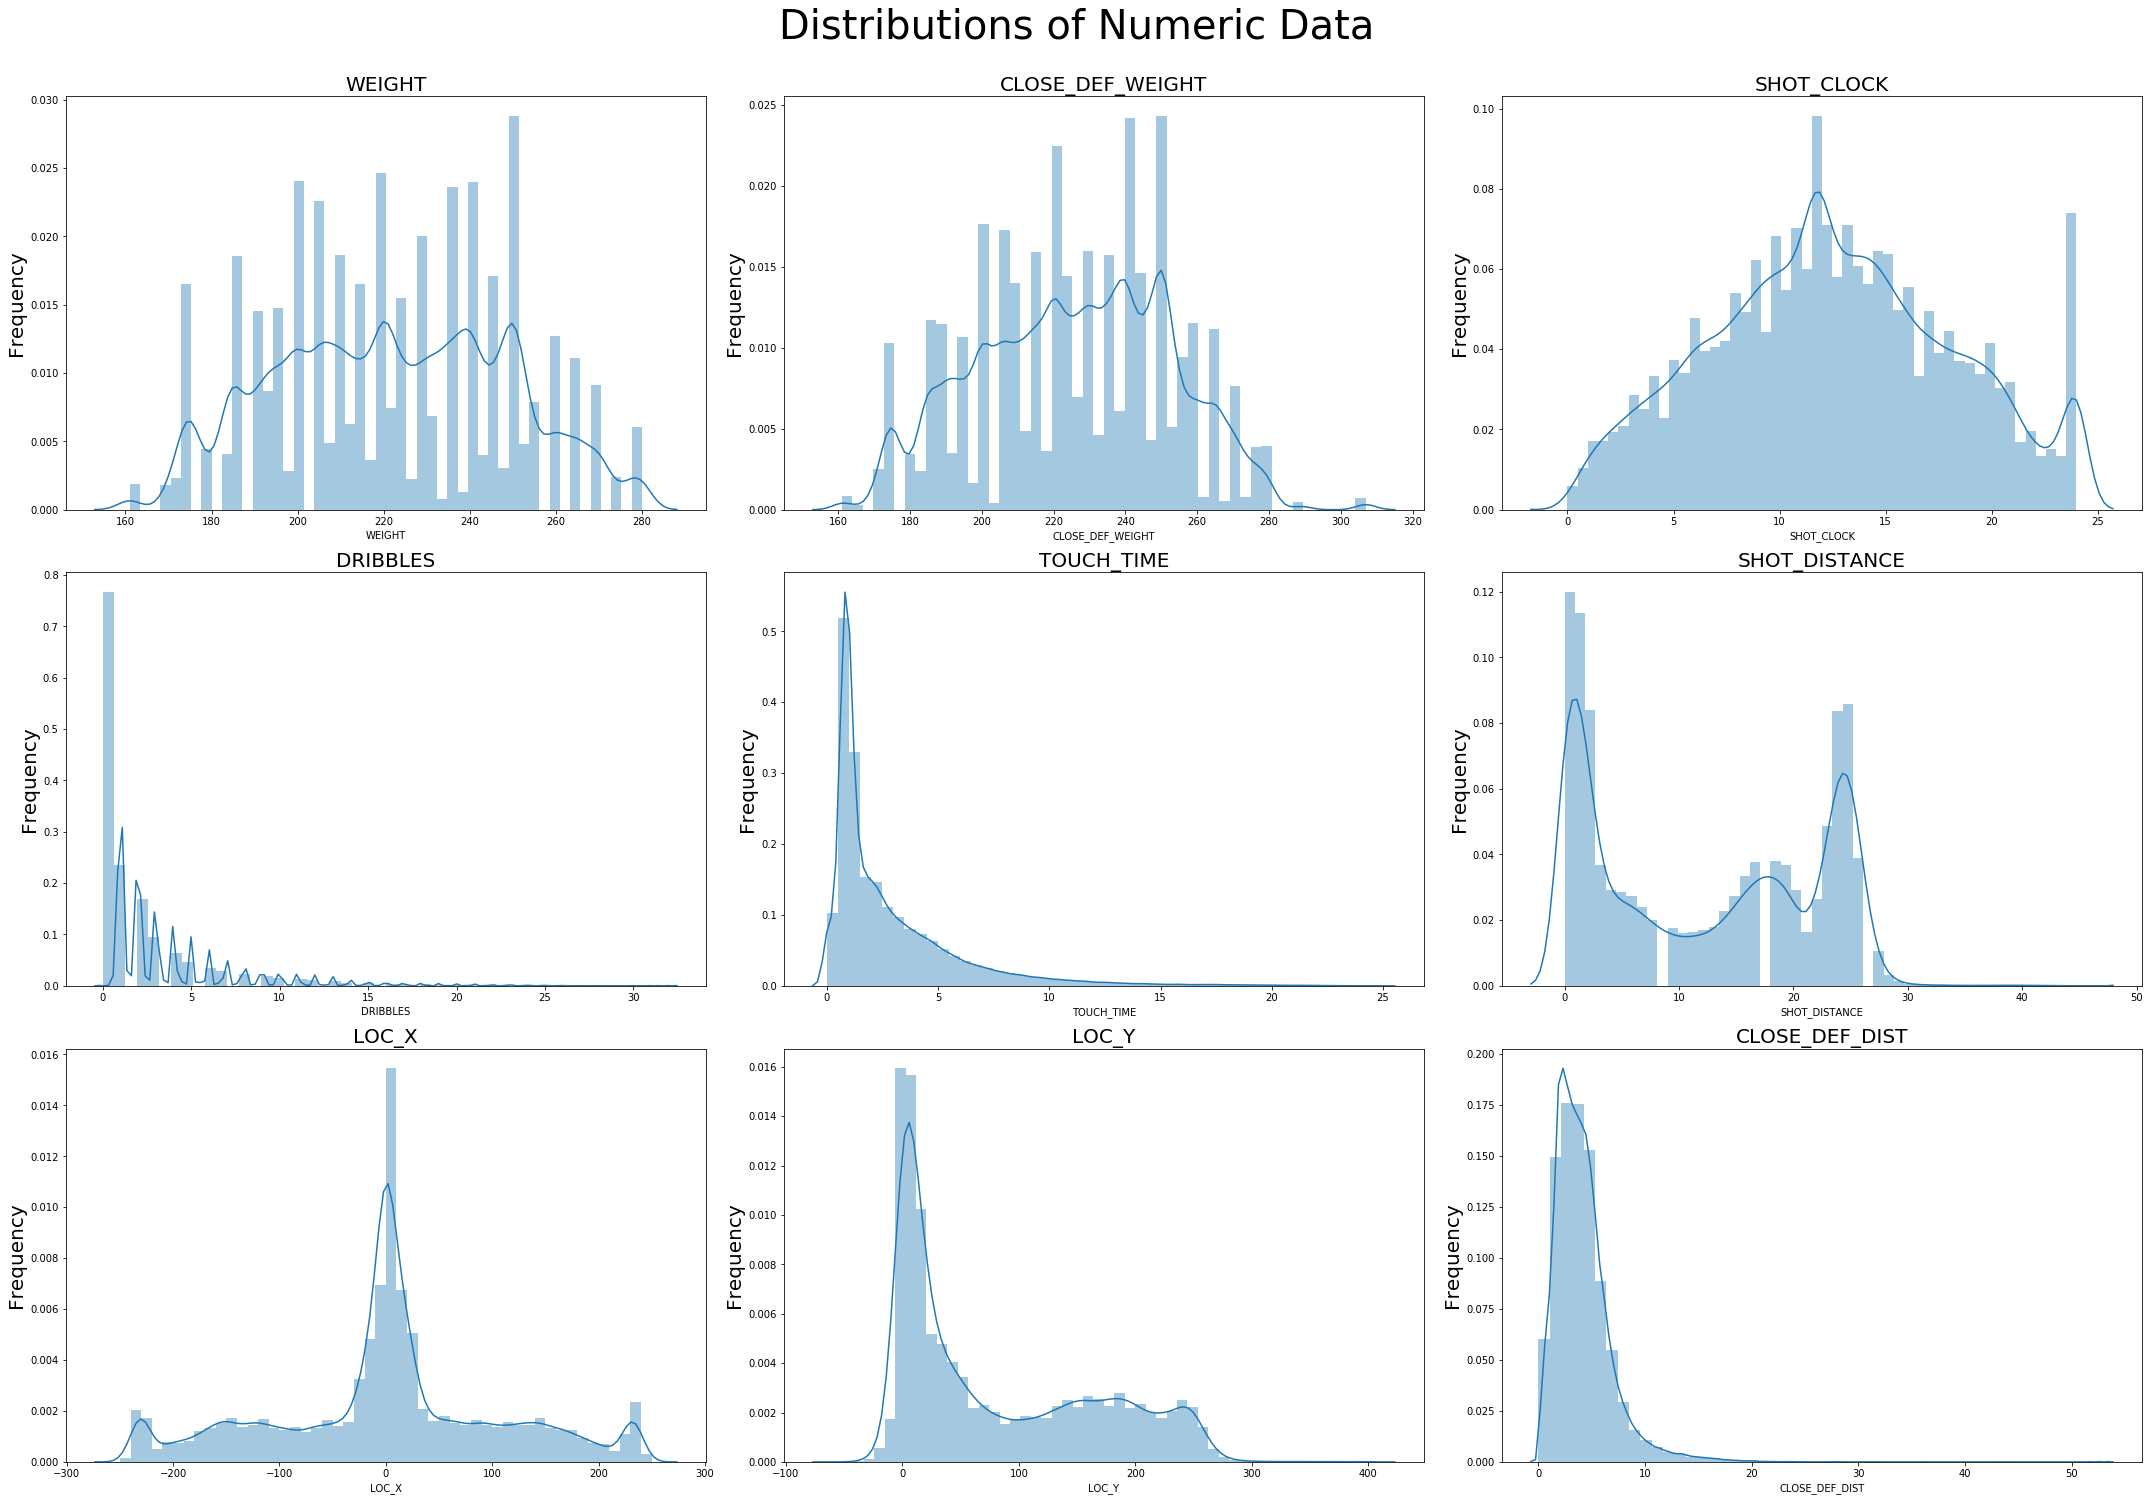

In [38]:
num_columns = ['WEIGHT', 'CLOSE_DEF_WEIGHT', 'SHOT_CLOCK', 'DRIBBLES',\
               'TOUCH_TIME', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y', 'CLOSE_DEF_DIST']

f,axes = plt.subplots(3,3,figsize=(30,20))
axes = axes.ravel()

for i,col in enumerate(num_columns):
    sns.distplot(data[col].dropna(),ax=axes[i])
    axes[i].set_title(col,size=20)
    axes[i].set_ylabel('Frequency',size=20)
    axes[i].tick_params(axis='y', labelsize=10)
plt.suptitle("Distributions of Numeric Data",size=40,y=1.04)
plt.tight_layout()
plt.show()

In [39]:
# x and y locations may just be handy for plotting, not sure how to interpret them
# will investigate further

In [40]:
# data.to_csv('capstone_data_V2.csv', index = False)

In [41]:
test = pd.read_csv('capstone_data_V2.csv')
print(test.shape)
test.head()

(125466, 26)


,ACTION_TYPE,PLAYER_NAME,PLAYER_ID,TEAM_NAME,PRIMARY_POSITION,HEIGHT,WEIGHT,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,PTS_TYPE,SHOT_RESULT_made,SHOT_RESULT_missed,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,CLOSE_DEF_DIST,CLOSE_DEF_NAME,CLOSE_DEF_ID,CLOSE_DEF_HEIGHT,CLOSE_DEF_WEIGHT,CLOSE_DEF_POSITION
0,Jump Shot,Kevin Garnett,708,Brooklyn Nets,4,6-11,240,5.2,0,0.8,2,0,1,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,72,131,3.8,Kelly Olynyk,203482,7-0,240,4
1,Jump Shot,Kevin Garnett,708,Brooklyn Nets,4,6-11,240,17.6,0,0.8,2,1,0,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,20,-84,186,7.3,Kelly Olynyk,203482,7-0,240,4
2,Fadeaway Jump Shot,Kevin Garnett,708,Brooklyn Nets,4,6-11,240,1.6,0,0.8,2,1,0,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,54,34,1.7,Kelly Olynyk,203482,7-0,240,4
3,Jump Shot,Kevin Garnett,708,Brooklyn Nets,4,6-11,240,10.6,0,0.8,2,0,1,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,17,-146,104,7.3,Kelly Olynyk,203482,7-0,240,4
4,Step Back Jump shot,Kevin Garnett,708,Brooklyn Nets,4,6-11,240,14.2,1,2.0,2,0,1,2PT Field Goal,Mid-Range,Center(C),16-24 ft.,19,-51,190,3.9,Kelly Olynyk,203482,7-0,240,4
